## Notebook To Display Interactive Time Series for CO2 Data
Elena Reinisch, 2018-09-11

## Load Libraries and Data

In [56]:
# start with same libraries as vector tutorial
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

In [24]:
%run -i load_data.py

## View Data

In [82]:
co2_geo_data_table.to_csv('co2_geo_data_table.csv')

In [83]:
co2_data_table.to_csv('co2_data_table.csv')

In [25]:
co2_data_table.head()

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source,geometry
0,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.104,1381.28,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
1,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.320,1267.75,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-35.512,1449.39,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
3,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-20.488,1025.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
4,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-22.272,1411.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)


We get a first look at how many unique sites we have.

In [26]:
len(co2_geo_data_table.Latitude.unique())

1352

Now we determine which flux column to take based on the number of measurements.

In [27]:
len(co2_geo_data_table[co2_geo_data_table['CO2 Flux'].isna()])

4033

In [28]:
len(co2_geo_data_table[co2_geo_data_table['CO2 Flux.1'].isna()])

4437

Because there are more records of CO2 Flux.1, we use these values for CO2 flux.

## Plot Static World Map

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


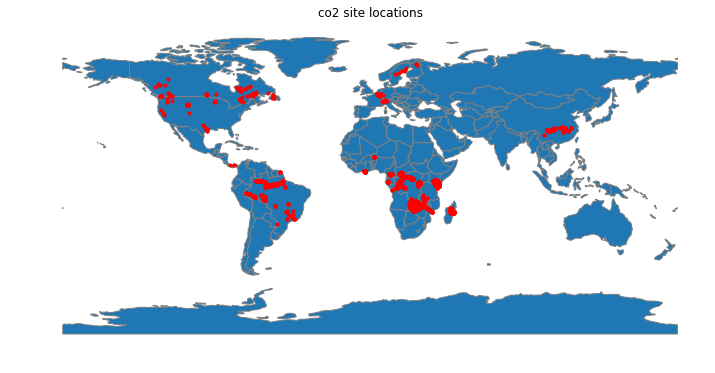

In [30]:
f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('co2 site locations')
world.plot(ax=ax, edgecolor='gray')
co2_geo_data_table.plot(ax=ax, marker='.', color='r')
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');

## Plot Values for North America in Interactive Map

### Initialize new figure

In [31]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Pull Data from N. America

In [32]:
NA_co2_geo_data_table = co2_geo_data_table[co2_geo_data_table.Latitude.between(23, 90) & co2_geo_data_table.Longitude.between(-131, -68)] 

In [33]:
NA_co2_geo_data_table.describe()

,Latitude,Longitude,Altitude,Discharge,Stream Slope,Width,Depth,Flow Velocity,Wind Speed,POC,...,pH,Water Temperature,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1
count,110.000000,110.000000,30.000000,0.0,0.0,40.000000,40.000000,0.0,0.0,2.000000,...,30.000000,30.000000,0.0,0.0,0.0,47.000000,0.0,0.0,0.0,62.000000
mean,46.024807,-97.801554,2342.866667,NaN,NaN,19.297250,0.766750,NaN,NaN,1.350000,...,7.683333,9.448667,NaN,NaN,NaN,1063.165957,NaN,NaN,NaN,315.764516
std,7.308169,17.756859,696.002563,NaN,NaN,65.361477,2.443879,NaN,NaN,0.494975,...,0.360262,2.970441,NaN,NaN,NaN,1265.263493,NaN,NaN,NaN,373.343924
min,28.878333,-126.000000,1211.000000,NaN,NaN,1.500000,0.030000,NaN,NaN,1.000000,...,6.630000,6.230000,NaN,NaN,NaN,186.000000,NaN,NaN,NaN,-325.900000
25%,44.336180,-107.147989,1660.750000,NaN,NaN,5.677500,0.070000,NaN,NaN,1.175000,...,7.522500,7.187500,NaN,NaN,NaN,318.500000,NaN,NaN,NaN,120.850000
50%,46.600000,-101.933334,2629.000000,NaN,NaN,6.540000,0.145000,NaN,NaN,1.350000,...,7.715000,7.695000,NaN,NaN,NaN,542.000000,NaN,NaN,NaN,318.950000
75%,50.300000,-77.000000,2863.500000,NaN,NaN,10.155000,0.555000,NaN,NaN,1.525000,...,7.922500,11.460000,NaN,NaN,NaN,960.000000,NaN,NaN,NaN,462.625000
max,59.600000,-68.400000,3311.000000,NaN,NaN,420.000000,15.500000,NaN,NaN,1.700000,...,8.170000,15.610000,NaN,NaN,NaN,6277.000000,NaN,NaN,NaN,1569.300000


### Plot Points with Labels of Reference and Site Type

In [65]:
firstmap = folium.Map(location=[39.8283, -98.5795], tiles='Stamen Terrain', zoom_start=4)
for index, row in NA_co2_geo_data_table.iterrows():
    iconcolor='blue'
    if pd.isnull(row['CO2']): # no CO2 values
        if pd.isnull(row['CO2 Flux.1']): # no CO2 values and no flux values
            iconcolor = 'red'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: no CO2 values".format(row['Site Type']),
                                  icon=folium.Icon(color=iconcolor, icon='warning-sign'))
            marker.add_to(firstmap)
        else:
            iconcolor = 'blue'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: CO2 flux =\n {} mg C m-2 d-1".format(row['Site Type'], row['CO2 Flux.1']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)
    else: # CO2 values
        if pd.isnull(row['CO2 Flux.1']): # CO2 values but no flux values
            iconcolor = 'purple'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: CO2 =\n {} micro-atm".format(row['Site Type'], row['CO2']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)
        else:
            iconcolor = 'green' # both CO2 values and flux values
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: \n CO2 = {} micro-atm \n CO2 flux = {} mg C m-2 d-1".format(row['Site Type'], row['CO2'], row['CO2 Flux.1']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)

### Visualize Map

In [66]:
firstmap

## Plot Interactive Time Series

First, we look at all of the available data with date values.

In [81]:
co2_geo_data_table[~co2_geo_data_table['DateTime'].isna()]

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source,geometry
0,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.104,1381.28000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
1,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.320,1267.75000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-35.512,1449.39000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
3,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-20.488,1025.55000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
4,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-22.272,1411.55000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
5,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,3.264,306.15000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)
6,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,2.712,270.20000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)
7,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,3.896,370.11000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)
8,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,3.832,368.21000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)
9,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,8.960,779.57000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)


The dates are in different formats.  While some dates are not identifiable, we can determine that some dates are year-only.  To be able to incoporate these into our data set

In [54]:
styledict = {
    '0': {
        '2017-1-1': {'color': 'ffffff', 'opacity': 1}
        '2017-1-2': {'color': 'fffff0', 'opacity': 1}
        ...
        },
    ...,
    'n': {
        '2017-1-1': {'color': 'ffffff', 'opacity': 1}
        '2017-1-2': {'color': 'fffff0', 'opacity': 1}
        ...
        }
}



m = folium.Map([0, 0], tiles='Stamen Toner', zoom_start=2)

g = TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict,

).add_to(m)


In [62]:
plt.figure()
m = folium.Map([0, 0], tiles='Stamen Toner', zoom_start=2)
g = TimeSliderChoropleth(
    NA_co2_geo_data_table.to_json(),
    styledict=styledict,

).add_to(m)

m


<Figure size 432x288 with 0 Axes>